In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tifffile import imread

In [ ]:
def plot_birefringence_colorized(retardance_img, azimuth_img):
    # Get pixel coords
    colors = np.zeros([azimuth_img.shape[0], azimuth_img.shape[0], 3])
    A = azimuth_img * 1
    # A = np.fmod(A,np.pi)
    colors[:,:,0] = A / A.max()
    colors[:,:,1] = 0.5
    colors[:,:,2] = retardance_img / retardance_img.max()

    colors[np.isnan(colors)] = 0

    from matplotlib.colors import hsv_to_rgb
    rgb = hsv_to_rgb(colors)
    
    plt.imshow(rgb, cmap='hsv')

In [5]:
def transform_from_pinhole(pinhole_img, n_lenses, n_pix):
    '''Transforms a light field image into an image of perspective views
    Parameters:
        img: 2D numpy array of shape (n_lenses * n_pix, n_lenses * n_pix)
        n_lenses: int
        n_pix: int
    Returns:
        pinhole_img: 2D numpy array
    '''
    lf_img = np.zeros((n_lenses * n_pix, n_lenses * n_pix))
    for lx in range(n_lenses):
        for ly in range(n_lenses):
            for i in range(n_pix):
                for j in range(n_pix):
                    lfx = lx * n_pix + i
                    lfy = ly * n_pix + j
                    psx = i *  n_lenses + lx
                    psy = j *  n_lenses + ly
                    lf_img[psx, psy] = pinhole_img[lfx, lfy]
    return lf_img


In [6]:
def transform_from_pinhole_2channels(pinhole_img, n_lenses, n_pix):
    '''Transforms a pair of light field images into images of perspective views
    Parameters:
        pinhole_img: 3D numpy array of shape (2, n_lenses * n_pix, n_lenses * n_pix)
        n_lenses: int
        n_pix: int
    Returns:
        lf_img: 3D numpy array
    '''
    lf_img = np.zeros((2, n_lenses * n_pix, n_lenses * n_pix))
    # pinhole_img = np.zeros((2, n_lenses * n_pix, n_lenses * n_pix))
    for ch in range(2):
        lf_img[ch] = transform_from_pinhole(pinhole_img[ch], n_lenses, n_pix)
    return lf_img

In [ ]:
def stack2pinhole(img, n_lenses, n_pix):
    '''Transforms a pinhole perspective LF image into
    a stack of pinhole images.
    Parameters:
        img (np.array): 2D array of shape n_pix*n_lenses squared
        n_lenses (int): number of microlenses
        n_pix (int): number of pixels per microlens
    Returns:
        pinhole_stack (np.array): 3D array of shape 
                                    (n_pix * n_pix, n_lenses, n_lenses)
    '''
    block_list = []
    img_mla = np.zeros((n_lenses * n_pix, n_lenses * n_pix))
    for i in range(n_pix):
        for j in range(n_pix):
            block = img[i*n_lenses:(i+1)*n_lenses, j*n_lenses:(j+1)*n_lenses]
            block_list.append(block)
    pinhole_stack = np.array(block_list)
    return pinhole_stack

In [ ]:
def concat_pinholes_ret_azim(img, n_lenses, n_pix):
    '''Transforms a pinhole perspective LF images of the retardance and azimuth
    into a stack of pinhole images with retardance and azimuth combined.
    Parameters:
        img (np.array): 3D array of shape (2, n_pix*n_lenses, n_pix*n_lenses)
        n_lenses (int): number of microlenses
        n_pix (int): number of pixels per microlens
    Returns:
        pinhole_stack (np.array): 3D array of shape 
                    (2 * n_pix * n_pix, n_lenses, n_lenses) where the first
                    half of indices come from the retardance image, and the
                    second half come from the azimuth image
    '''
    pin_stack_ret = pinhole2stack(img[0], n_lenses, n_pix)
    pin_stack_azim = pinhole2stack(img[1], n_lenses, n_pix)
    concat_array = np.concatenate((pin_stack_ret, pin_stack_azim), axis=0)
    return concat_array

In [13]:
lf_filename = f"../../inference/relu/source.tiff"
img_stack = imread(lf_filename)

In [14]:
img_stack.shape

(512, 16, 16)

In [16]:
n_lenses = 16
n_pix = 16
img_mla = np.zeros((n_lenses * n_pix, n_lenses * n_pix))

In [29]:
img_mla
i = 0; j = 0
# int(img_stack.shape[0]) / 2
for slice in range(256):
    print(f'slice: {slice}, i: {i}, j: {j}, max: {img_stack[slice, ...].max()}')
    for i in range(n_lenses):
        for j in range(n_lenses):
            img_mla[i*n_lenses:(i+1)*n_lenses, j*n_lenses:(j+1)*n_lenses] = img_stack[slice, ...]

slice: 0, i: 0, j: 0, max: 0.0
slice: 1, i: 15, j: 15, max: 0.0
slice: 2, i: 15, j: 15, max: 0.0
slice: 3, i: 15, j: 15, max: 0.0
slice: 4, i: 15, j: 15, max: 0.0
slice: 5, i: 15, j: 15, max: 0.0
slice: 6, i: 15, j: 15, max: 0.0
slice: 7, i: 15, j: 15, max: 0.0
slice: 8, i: 15, j: 15, max: 0.0
slice: 9, i: 15, j: 15, max: 0.0
slice: 10, i: 15, j: 15, max: 0.0
slice: 11, i: 15, j: 15, max: 0.0
slice: 12, i: 15, j: 15, max: 0.0
slice: 13, i: 15, j: 15, max: 0.0
slice: 14, i: 15, j: 15, max: 0.0
slice: 15, i: 15, j: 15, max: 0.0
slice: 16, i: 15, j: 15, max: 0.0
slice: 17, i: 15, j: 15, max: 0.0
slice: 18, i: 15, j: 15, max: 0.0
slice: 19, i: 15, j: 15, max: 0.0
slice: 20, i: 15, j: 15, max: 0.3557191789150238
slice: 21, i: 15, j: 15, max: 0.3216397166252136
slice: 22, i: 15, j: 15, max: 0.29959428310394287
slice: 23, i: 15, j: 15, max: 0.3096027076244354
slice: 24, i: 15, j: 15, max: 0.3096027076244354
slice: 25, i: 15, j: 15, max: 0.29959428310394287
slice: 26, i: 15, j: 15, max: 0.3216

In [24]:
i = 15
j = 15
img_mla[i*n_lenses:(i+1)*n_lenses, j*n_lenses:(j+1)*n_lenses]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

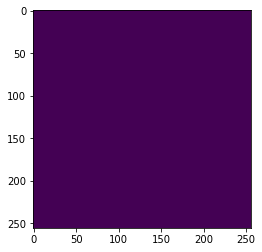

In [31]:
plt.imshow(img_mla*1000)

In [26]:
slice = 21
img_stack[slice, ...]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 

In [11]:
lf_img = transform_from_pinhole(img, 16, 16)

ValueError: setting an array element with a sequence.